<a href="https://colab.research.google.com/github/pwirap/Investigate_Business_Hotel_using_Data_Visualization/blob/main/PHILIPUS_Investigate_Hotel_Business_using_Data_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Nama : Philipus Dima Wira Pratomo
Batch : 33

In [ ]:
import dataclasses
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

## Load and Data Understanding

In [ ]:
df = pd.read_csv('hotel_bookings_data.csv')

In [ ]:
pd.set_option('display.max_columns', None)
df.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status
95615,City Hotel,0,199,2018,October,34,14,2,5,3,0.0,0,Breakfast,Kota Yogyakarta,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,127.62,0,2,Check-Out
40963,City Hotel,0,39,2017,October,33,10,1,1,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1.0,NaN,0,Family,62.00,0,1,Check-Out
102089,City Hotel,0,20,2018,January,48,22,0,1,2,0.0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,116.00,0,0,Check-Out
70206,City Hotel,1,139,2019,August,24,12,1,1,2,0.0,0,Breakfast,Kota Denpasar,Offline TA/TO,TA/TO,0,0,0,0,Non Refund,20.0,NaN,0,Personal,110.00,0,0,Canceled
26683,Resort Hotel,0,214,2018,October,32,1,2,5,2,0.0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,138.00,0,1,Check-Out
30253,Resort Hotel,0,52,2018,January,47,14,1,3,2,0.0,0,Breakfast,Kabupaten Sumedang,Online TA,TA/TO,0,0,0,0,No Deposit,240.0,NaN,0,Personal,67.80,0,3,Check-Out
69353,City Hotel,1,186,2019,July,22,30,0,2,2,0.0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,19.0,NaN,0,Personal,130.00,0,0,Canceled
58961,City Hotel,1,77,2018,December,43,19,0,2,1,0.0,0,Breakfast,Kota Jambi,Online TA,TA/TO,0,0,0,0,No Deposit,9.0,NaN,0,Personal,113.40,0,0,Canceled
2725,Resort Hotel,0,49,2017,December,44,28,2,5,1,0.0,0,Dinner,Kabupaten Sumedang,Direct,Direct,0,0,0,0,No Deposit,NaN,NaN,0,Personal,63.76,0,1,Check-Out
102919,City Hotel,0,14,2018,February,50,5,1,3,2,0.0,0,Breakfast,Kota Batu,Online TA,TA/TO,0,0,0,0,No Deposit,7.0,NaN,0,Personal,70.88,0,0,Check-Out


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

1. Dataset memeiliki 119390 records dan 29 fitur
2. Fitur Children,agent dan company bisa diubah menjadi Integer

Checking for Null Values

In [ ]:
misval1 = df.isnull().sum()
print(misval1.sort_values(ascending=False))

company                           112593
agent                              16340
city                                 488
children                               4
hotel                                  0
is_repeated_guest                      0
total_of_special_requests              0
required_car_parking_spaces            0
adr                                    0
customer_type                          0
days_in_waiting_list                   0
deposit_type                           0
booking_changes                        0
previous_bookings_not_canceled         0
previous_cancellations                 0
market_segment                         0
distribution_channel                   0
is_canceled                            0
meal                                   0
babies                                 0
adults                                 0
stays_in_weekdays_nights               0
stays_in_weekend_nights                0
arrival_date_day_of_month              0
arrival_date_wee

In [ ]:
((df.isna().sum())/len(df)*100).round(2).sort_values(ascending=False)

company                           94.31
agent                             13.69
city                               0.41
hotel                              0.00
distribution_channel               0.00
total_of_special_requests          0.00
required_car_parking_spaces        0.00
adr                                0.00
customer_type                      0.00
days_in_waiting_list               0.00
deposit_type                       0.00
booking_changes                    0.00
previous_bookings_not_canceled     0.00
previous_cancellations             0.00
is_repeated_guest                  0.00
market_segment                     0.00
is_canceled                        0.00
meal                               0.00
babies                             0.00
children                           0.00
adults                             0.00
stays_in_weekdays_nights           0.00
stays_in_weekend_nights            0.00
arrival_date_day_of_month          0.00
arrival_date_week_number           0.00


terdapat beberapa data null yang perlu dihandle pada feature company, agent, city, children

Checking for Values

In [ ]:
#melihat unique value di setiap kolom bertipe object
for col in df:
    unique_values = df[col].unique()
    print('Column:', col)
    print('Unique values:', list(unique_values))
    print()

Column: hotel
Unique values: ['Resort Hotel', 'City Hotel']

Column: is_canceled
Unique values: [0, 1]

Column: lead_time
Unique values: [342, 737, 7, 13, 14, 0, 9, 85, 75, 23, 35, 68, 18, 37, 12, 72, 127, 78, 48, 60, 77, 99, 118, 95, 96, 69, 45, 40, 15, 36, 43, 70, 16, 107, 47, 113, 90, 50, 93, 76, 3, 1, 10, 5, 17, 51, 71, 63, 62, 101, 2, 81, 368, 364, 324, 79, 21, 109, 102, 4, 98, 92, 26, 73, 115, 86, 52, 29, 30, 33, 32, 8, 100, 44, 80, 97, 64, 39, 34, 27, 82, 94, 110, 111, 84, 66, 104, 28, 258, 112, 65, 67, 55, 88, 54, 292, 83, 105, 280, 394, 24, 103, 366, 249, 22, 91, 11, 108, 106, 31, 87, 41, 304, 117, 59, 53, 58, 116, 42, 321, 38, 56, 49, 317, 6, 57, 19, 25, 315, 123, 46, 89, 61, 312, 299, 130, 74, 298, 119, 20, 286, 136, 129, 124, 327, 131, 460, 140, 114, 139, 122, 137, 126, 120, 128, 135, 150, 143, 151, 132, 125, 157, 147, 138, 156, 164, 346, 159, 160, 161, 333, 381, 149, 154, 297, 163, 314, 155, 323, 340, 356, 142, 328, 144, 336, 248, 302, 175, 344, 382, 146, 170, 166, 338, 16

1. terdapat value "undefined" pada feature meal,market_segment,distribution_channel yang kurang sesuai, akan dianalisis lebih lanjut apakah akan di handle atau tidak
2. terdapat value data yang kurang tepat, dimana Adults = 0
3. terdapat value data yang kurang tepat pada stays_in_weekend_nights = 0 dan stays_in_weekdays_nights = 0 juga


Checking for Data Duplicates

In [ ]:
df.duplicated().sum()

33261

terdapat 33261 data duplikat

Statistical Descriptive

In [ ]:
num = df.select_dtypes(include=[np.number])
cat = df.select_dtypes(include=[np.object])

<ipython-input-9-837a74656d8d>:2: DeprecationWarning: `np.object` is a deprecated alias for the builtin `object`. To silence this warning, use `object` by itself. Doing this will not modify any behavior and is safe. 
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cat = df.select_dtypes(include=[np.object])


In [ ]:
cat.describe()

,hotel,arrival_date_month,meal,city,market_segment,distribution_channel,deposit_type,customer_type,reservation_status
count,119390,119390,119390,118902,119390,119390,119390,119390,119390
unique,2,12,5,177,8,5,3,4,3
top,City Hotel,October,Breakfast,Kota Denpasar,Online TA,TA/TO,No Deposit,Personal,Check-Out
freq,79330,13877,92310,48590,56477,97870,104641,89613,75166


In [ ]:
num.describe().T

,count,mean,std,min,25%,50%,75%,max
is_canceled,119390.0,0.370416,0.482918,0.00,0.00,0.000,1.0,1.0
lead_time,119390.0,104.011416,106.863097,0.00,18.00,69.000,160.0,737.0
arrival_date_year,119390.0,2018.156554,0.707476,2017.00,2018.00,2018.000,2019.0,2019.0
arrival_date_week_number,119390.0,27.165173,13.605138,1.00,16.00,28.000,38.0,53.0
arrival_date_day_of_month,119390.0,15.798241,8.780829,1.00,8.00,16.000,23.0,31.0
stays_in_weekend_nights,119390.0,0.927599,0.998613,0.00,0.00,1.000,2.0,19.0
stays_in_weekdays_nights,119390.0,2.500302,1.908286,0.00,1.00,2.000,3.0,50.0
adults,119390.0,1.856403,0.579261,0.00,2.00,2.000,2.0,55.0
children,119386.0,0.103890,0.398561,0.00,0.00,0.000,0.0,10.0
babies,119390.0,0.007949,0.097436,0.00,0.00,0.000,0.0,10.0


Fitur adr, Averange Daily Rate (room revenue/number of room sold) terdapat value negatif

Summary :
1. Dataset memeiliki 119390 records dan 29 fitur
2. Fitur Children,agent dan company bisa diubah menjadi Integer (dtypes kurang sesuai) V
3. terdapat beberapa data null yang perlu dihandle pada feature company, agent, city, children (null handle) V
4. terdapat value "undefined" pada feature meal yang kurang sesuai (value yang tidak sesuai) V
5. terdapat value data yang kurang tepat, dimana Adults = 0 (membuang data) V
6. terdapat value data yang kurang tepat pada stays_in_weekend_nights = 0 dan stays_in_weekdays_nights = 0 juga (membuang data) V
7. terdapat 33261 data duplikat (duplikat data)
8. Fitur adr, Averange Daily Rate (room revenue/number of room sold) terdapat value negatif (membuang data) V


## Data Preprocessing

Handling Missing Value

In [ ]:
df_dt = df.copy()

1. company - null value diisi dengan 0, mengindikasikan tamu tidak bersal dari
company
2. agent - null value diisi dengan 0, mengindikasikan tamu melakukan reservasi mandiri atau tidak melalui agen
3. children - null value diisi dengan 0, mengindikasikan tamu tidak membawa anak-anak
4. city - null values diisi dengan 'Undefined', karena kota tidak diketahui secara pasti.

In [ ]:
df_dt['company'] = df_dt['company'].fillna(0)
df_dt['agent'] = df_dt['agent'].fillna(0)
df_dt['children'] = df_dt['children'].fillna(0)
df_dt['city'] = df_dt['city'].fillna('unknown')

Handling Data Types

In [ ]:
data_datypes = df_dt.copy()

In [ ]:
data_datypes['children'] = data_datypes['children'].astype('int64')
data_datypes['agent'] = data_datypes['agent'].astype('int64')
data_datypes['company'] = data_datypes['company'].astype('int64')

In [ ]:
data_datypes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 29 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_weekdays_nights        119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119390 non-null  int64  
 11  babies                          119390 non-null  int64  
 12  meal            

Replace inappropriate values

In [ ]:
data_iv = data_datypes.copy()

In [ ]:
data_iv['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       10650
Undefined      1169
Full Board      798
Name: meal, dtype: int64

Mengubah 'Undefined' pada meal menjadi no meal

In [ ]:
data_iv = data_iv.replace({'meal': {'Undefined':'No Meal'}})

In [ ]:
data_iv['meal'].value_counts()

Breakfast     92310
Dinner        14463
No Meal       11819
Full Board      798
Name: meal, dtype: int64

Discard unnecessary data

yang akan dilakukan pada tahap ini terdiri dari :
1. terdapat value data yang kurang tepat, dimana Adults = 0
2. terdapat value data yang kurang tepat pada stays_in_weekend_nights = 0 dan stays_in_weekdays_nights = 0 juga
3. Fitur adr, Averange Daily Rate (room revenue/number of room sold) terdapat value negatif

In [ ]:
data_ud = data_iv.copy()

In [ ]:
data_ud['stay_duration'] = data_ud['stays_in_weekend_nights'] + data_ud['stays_in_weekdays_nights']

In [ ]:
data_ud = data_ud[(data_ud['adults'] > 0) & (data_ud['stay_duration'] > 0) & (data_ud['adr'] > 0)]

Handling Duplicate

In [ ]:
data_ud.duplicated().sum()

33047

Setelah dilakukan beberapa data prepocessing terdapat data duplicate sebesar 33047. Namun, Data tanpa unik_id/unik_booking_id dan tanggal mungkin berisi data yang disebabkan oleh pemesanan yang sama pada waktu yang berbeda.

Monthly Hotel Booking Analysis Based on Hotel Type

In [ ]:
data_fix = data_ud.copy()

Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

In [ ]:
# membuat summary dari aggregasi total booking per month
monthly_book = data_fix.groupby(['hotel', 'arrival_date_month'])['arrival_date_year'].agg(['nunique', 'count']).reset_index()
monthly_book

,hotel,arrival_date_month,nunique,count
0,City Hotel,April,2,4855
1,City Hotel,August,2,7802
2,City Hotel,December,2,7451
3,City Hotel,February,2,3985
4,City Hotel,January,2,4254
5,City Hotel,July,2,8102
6,City Hotel,June,2,7384
7,City Hotel,March,2,3652
8,City Hotel,May,2,6348
9,City Hotel,November,2,7269


Lakukan normalisasi data

Pada data diatas, Setiap bulan seharusnya memiliki jumlah tahun yang sama agar perbandingannya sama. Tetapi ada masalah di bulan Oktober dan September karena terdapat tiga tahun : 2017, 2018, dan 2019. Sementara bulan-bulan lainnya hanya memiliki dua tahun, yaitu 2017 dan 2018. Agar memiliki perbandingan yang sama, maka dilakukan normalisasi dengan menghitung rata-ratanya (total/nunique).

In [ ]:
monthly_book['book_per_month_average'] = round(monthly_book['count']/monthly_book['nunique'])
monthly_book

,hotel,arrival_date_month,nunique,count,book_per_month_average
0,City Hotel,April,2,4855,2428.0
1,City Hotel,August,2,7802,3901.0
2,City Hotel,December,2,7451,3726.0
3,City Hotel,February,2,3985,1992.0
4,City Hotel,January,2,4254,2127.0
5,City Hotel,July,2,8102,4051.0
6,City Hotel,June,2,7384,3692.0
7,City Hotel,March,2,3652,1826.0
8,City Hotel,May,2,6348,3174.0
9,City Hotel,November,2,7269,3634.0


Urutkan data berdasarkan bulan

In [ ]:
monthly_book = monthly_book.replace({'arrival_date_month': {'January':1, 'February':2, 'March':3, 'April':4, 'May':5, 'June':6,
                                            'July':7, 'August':8, 'September':9, 'October':10, 'November':11, 'December':12}})

monthly_book = monthly_book.sort_values('arrival_date_month')

monthly_book = monthly_book.replace({'arrival_date_month': {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
                                            7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}})

In [ ]:
monthly_book

,hotel,arrival_date_month,nunique,count,book_per_month_average
4,City Hotel,Jan,2,4254,2127.0
16,Resort Hotel,Jan,2,2375,1188.0
3,City Hotel,Feb,2,3985,1992.0
15,Resort Hotel,Feb,2,2552,1276.0
7,City Hotel,Mar,2,3652,1826.0
19,Resort Hotel,Mar,2,2130,1065.0
0,City Hotel,Apr,2,4855,2428.0
12,Resort Hotel,Apr,2,3046,1523.0
20,Resort Hotel,May,2,3272,1636.0
8,City Hotel,May,2,6348,3174.0


Buatlah plot yang dapat menunjukan perubahan kenaikan maupun penurunan dari jumlah pemesanan hotel setiap bulannya berdasarkan jenis hotel

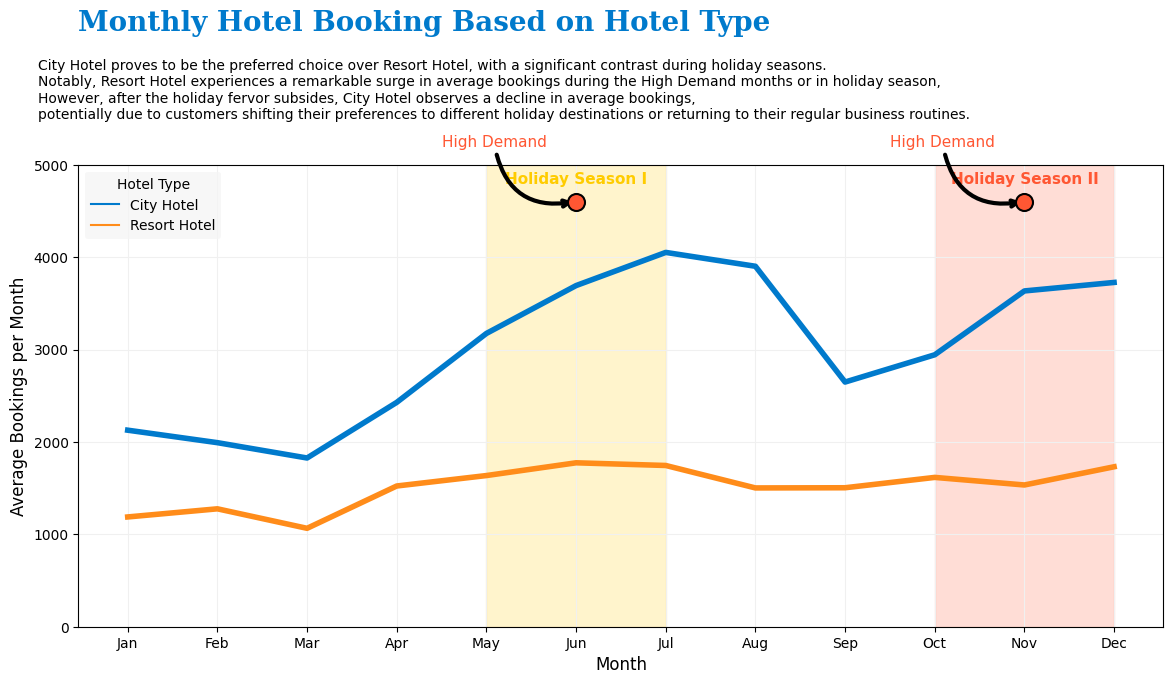

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set a more attractive color palette
colors = ['#007acc', '#ff8c1a']

# Create a figure and axis
fig, ax = plt.subplots(figsize=(14, 6))

# Plot the data with more styling
sns.lineplot(x='arrival_date_month', y='book_per_month_average', hue='hotel', data=monthly_book, palette=colors, linewidth=4)

# Customize the plot
plt.grid(color='#f0f0f0')
plt.ylim(0, 5000)
plt.tick_params(axis='both', which='major', labelsize=10)
plt.ylabel('Average Bookings per Month', fontsize=12)
plt.xlabel('Month', fontsize=12)

# Add a legend with a shadow
legend = plt.legend(title='Hotel Type', fontsize=10)
legend.get_frame().set_linewidth(0)
legend.get_frame().set_facecolor('#f5f5f5')
legend.get_frame().set_alpha(0.7)

# Set holiday seasons with a more vibrant color
holiday_seasons = [(4, 6, 'Holiday Season I', '#ffcc00'), (9, 11, 'Holiday Season II', '#ff5733')]
for start, end, label, color in holiday_seasons:
    plt.axvspan(start, end, alpha=0.2, color=color)
    plt.text((start + end) / 2, 4800, label, fontsize=11, color=color, ha='center', fontweight='bold')

# Add larger circular markers for peak seasons
peak_seasons = [(5, 'Peak Season', '#ff5733'), (10, 'Peak Season', '#ff5733')]
for x, label, color in peak_seasons:
    plt.scatter(x, 4600, color=color, marker='o', s=150, label=label, zorder=5, edgecolor='black', linewidth=1.5)
    plt.annotate('High Demand', xy=(x, 4600), xytext=(x - 1.5, 5200),
                 arrowprops=dict(arrowstyle='->', connectionstyle="arc3,rad=0.5", linewidth=3,color='black'), fontsize=11, color=color)

# Add a more creative title with a shadow
plt.title('Monthly Hotel Booking Based on Hotel Type', fontsize=20, pad=30, loc='left', fontweight='bold', color='#007acc',
          fontfamily='serif',y=1.2)
plt.text(x=-1, y=5500, s="City Hotel proves to be the preferred choice over Resort Hotel, with a significant contrast during holiday seasons.\nNotably, Resort Hotel experiences a remarkable surge in average bookings during the High Demand months or in holiday season,\nHowever, after the holiday fervor subsides, City Hotel observes a decline in average bookings,\npotentially due to customers shifting their preferences to different holiday destinations or returning to their regular business routines.", fontsize=10)


# Show the plot
plt.show()


Impact Analysis of Stay Duration on Hotel Bookings Cancellation Rates

In [ ]:
data_fix_2 = data_ud.copy()

Buatlah kolom baru yang berisi total durasi menginap.

sudah terdapat kolom stay_duration sebelumnya yang sudah dibuat, untuk mengetahui berapa lama customer menginap

In [ ]:
pd.set_option('display.max_columns', None)
data_fix_2.sample(10)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_weekdays_nights,adults,children,babies,meal,city,market_segment,distribution_channel,is_repeated_guest,previous_cancellations,previous_bookings_not_canceled,booking_changes,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,stay_duration
3663,Resort Hotel,0,165,2017,February,53,30,0,4,2,0,0,No Meal,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,308,0,122,Family,136.50,0,0,Check-Out,4
40282,City Hotel,0,12,2017,September,29,18,2,2,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,1,0,0,Family,62.00,0,0,Check-Out,4
72525,City Hotel,1,11,2019,September,31,30,1,0,2,0,0,Breakfast,Kabupaten Belitung,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,129.00,0,2,Canceled,1
371,Resort Hotel,1,42,2017,September,29,13,1,4,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,240,0,0,Personal,120.00,0,0,Canceled,5
63057,City Hotel,1,5,2019,March,4,28,0,1,2,0,0,Breakfast,Kota Denpasar,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,108.00,0,0,Canceled,1
24797,Resort Hotel,0,146,2018,July,23,31,0,4,2,0,0,Dinner,Kota Yogyakarta,Online TA,TA/TO,0,0,0,1,No Deposit,240,0,0,Personal,134.50,0,1,Check-Out,4
24204,Resort Hotel,0,236,2018,July,20,12,0,3,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,No Deposit,315,0,0,Family,54.00,1,0,Check-Out,3
9419,Resort Hotel,1,222,2018,January,48,26,2,1,2,0,0,Breakfast,Kota Denpasar,Groups,TA/TO,0,0,0,0,Non Refund,11,0,0,Personal,30.00,0,0,Canceled,3
28289,Resort Hotel,0,243,2018,November,39,19,3,6,2,0,0,Breakfast,Kabupaten Bangka,Online TA,TA/TO,0,0,0,0,No Deposit,241,0,0,Personal,64.54,0,1,Check-Out,9
49024,City Hotel,1,14,2018,June,15,4,4,10,1,0,0,Breakfast,Kabupaten Pandeglang,Online TA,TA/TO,0,0,0,0,No Deposit,9,0,0,Personal,132.00,0,0,Canceled,14


Kelompokkan nilai-nilai dari kolom baru pada langkah sebelumnya supaya lebih signifikan

Untuk mempermudah analisis akan dibagi kedalam kelompok nilai - nilai pada durasi customer :
1. kurang dari sama dengan 7 hari = 1 Weeks
2. 8 hari - 14 hari = 2 Weeks
3. 15 hari - 21 hari = 3 weeks
4. 22 hari - 28 hari = 4 weeks
5. lebih dari 28 hari = more than 4 weeks

In [ ]:
data_fix_2['group_stay_duration'] = np.where((data_fix_2['stay_duration']) < 8, '1 Weeks' ,
                                   np.where((data_fix_2['stay_duration']) < 15, '2 Weeks',
                                   np.where((data_fix_2['stay_duration']) < 22, '3 Weeks',
                                   np.where((data_fix_2['stay_duration']) < 29, '4 Weeks', 'More than 4 Weeks'))))

In [ ]:
data_fix_2['group_stay_duration'].value_counts()

1 Weeks              111992
2 Weeks                4766
3 Weeks                 273
4 Weeks                 108
More than 4 Weeks        43
Name: group_stay_duration, dtype: int64

Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap durasi menginap untuk setiap jenis hotel

In [ ]:
cancelation_rate = data_fix_2.groupby(['hotel', 'group_stay_duration']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancelation_rate['cancel_rate'] = 100*(cancelation_rate['is_canceled'] / cancelation_rate['arrival_date_day_of_month']).round(2)
cancelation_rate

,hotel,group_stay_duration,is_canceled,arrival_date_day_of_month,cancel_rate
0,City Hotel,1 Weeks,32219,76665,42.0
1,City Hotel,2 Weeks,555,1059,52.0
2,City Hotel,3 Weeks,76,105,72.0
3,City Hotel,4 Weeks,21,25,84.0
4,City Hotel,More than 4 Weeks,20,21,95.0
5,Resort Hotel,1 Weeks,9835,35327,28.0
6,Resort Hotel,2 Weeks,1078,3707,29.0
7,Resort Hotel,3 Weeks,79,168,47.0
8,Resort Hotel,4 Weeks,39,83,47.0
9,Resort Hotel,More than 4 Weeks,7,22,32.0


Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap durasi menginap untuk setiap tipe hotel

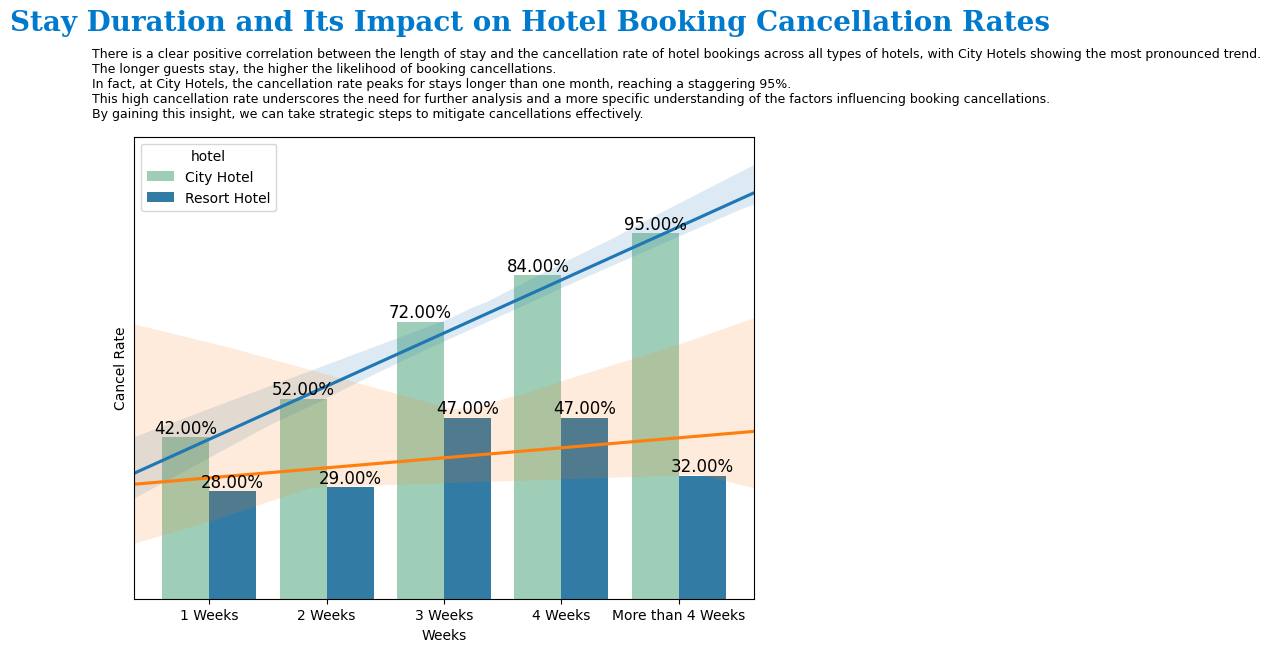

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=cancelation_rate, x='group_stay_duration', y='cancel_rate', hue='hotel', palette='YlGnBu')
plt.ylim(0,120)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)

sns.regplot(x=np.arange(0, len(cancelation_rate[cancelation_rate['hotel'] == 'City Hotel'])), y='cancel_rate',
            data=cancelation_rate[cancelation_rate['hotel'] == 'City Hotel'], scatter=False, label = 'Trend City Hotel', truncate=False)
sns.regplot(x=np.arange(0, len(cancelation_rate[cancelation_rate['hotel'] == 'City Hotel'])), y='cancel_rate',
            data=cancelation_rate[cancelation_rate['hotel'] == 'Resort Hotel'], scatter=False, label='Trend Resort Hotel', truncate=False)

plt.title('Stay Duration and Its Impact on Hotel Booking Cancellation Rates', fontsize=20, pad=30, loc='left', fontweight='bold', color='#007acc',
          fontfamily='serif',y=1.14, x=-0.2)
plt.text(x=-1, y=125, s="There is a clear positive correlation between the length of stay and the cancellation rate of hotel bookings across all types of hotels, with City Hotels showing the most pronounced trend.\nThe longer guests stay, the higher the likelihood of booking cancellations.\nIn fact, at City Hotels, the cancellation rate peaks for stays longer than one month, reaching a staggering 95%.\nThis high cancellation rate underscores the need for further analysis and a more specific understanding of the factors influencing booking cancellations.\nBy gaining this insight, we can take strategic steps to mitigate cancellations effectively.", fontsize=9)

plt.xlabel('Weeks')
plt.ylabel('Cancel Rate')

#memberikan label value otomatis
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.2f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=12, color='black')

Tuliskan interpretasi terhadap hasil plot pada langkah sebelumnya

Impact Analysis of Lead Time on Hotel Bookings Cancellation Rate

In [ ]:
data_fix_3 = data_ud.copy()

Buatlah kolom baru yang berisi kategorisasi dari kolom jarak waktu pemesanan

Untuk mempermudah analisis akan dibagi kedalam kelompok nilai - nilai pada lead time :
1. 1 - 30 hari = 1
2. 31 - 61 hari = 2
3. 62 - 91 hari = 3
4. 92 - 121 hari = 4
5. 122 - 151 hari = 5
6. 152 - 181 hari = 6
7. 182 - 211 hari = 7
8. 212 - 241 hari = 8
9. 242 - 271 hari = 9
10. 272 - 301 hari = 10
11. 302 - 331 hari = 11
12. 332 - 361 hari = 12
13. lebih dari 361 hari = 13

In [ ]:
data_fix_3['leadtime_category'] = np.where((data_fix_3['lead_time']) < 31, '1',
                        np.where((data_fix_3['lead_time']) <= 61, '2',
                        np.where((data_fix_3['lead_time']) <= 91, '3',
                        np.where((data_fix_3['lead_time']) <= 121, '4',
                        np.where((data_fix_3['lead_time']) <= 151, '5',
                        np.where((data_fix_3['lead_time']) <= 181, '6',
                        np.where((data_fix_3['lead_time']) <= 211, '7',
                        np.where((data_fix_3['lead_time']) <= 241, '8',
                        np.where((data_fix_3['lead_time']) <= 271, '9',
                        np.where((data_fix_3['lead_time']) <= 301, '10',
                        np.where((data_fix_3['lead_time']) <= 331, '11',
                        np.where((data_fix_3['lead_time']) <= 361, '12', '> 1 year'))))))))))))

Buatlah tabel agregat yang menunjukan perbandingan jumlah pemesanan hotel yang dibatalkan terhadap jarak waktu pemesanan untuk setiap jenis hotel

In [ ]:
cancelation_leadtime_rate = data_fix_3.groupby(['hotel', 'leadtime_category']).agg({'is_canceled' : 'sum', 'arrival_date_day_of_month' : 'count'}).reset_index()
cancelation_leadtime_rate['cancel_leadtime_rate'] = 100*(cancelation_leadtime_rate['is_canceled'] / cancelation_leadtime_rate['arrival_date_day_of_month']).round(2)
cancelation_leadtime_rate

,hotel,leadtime_category,is_canceled,arrival_date_day_of_month,cancel_leadtime_rate
0,City Hotel,1,5100,22363,23.0
1,City Hotel,10,1942,2602,75.0
2,City Hotel,11,1502,1940,77.0
3,City Hotel,12,1001,1214,82.0
4,City Hotel,2,4783,12147,39.0
5,City Hotel,3,3587,8701,41.0
6,City Hotel,4,3461,7328,47.0
7,City Hotel,5,2561,5661,45.0
8,City Hotel,6,2686,5061,53.0
9,City Hotel,7,1772,3480,51.0


In [ ]:
cat = ['1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12', '> 1 year']
cancelation_leadtime_rate['leadtime_category'] = pd.Categorical(cancelation_leadtime_rate['leadtime_category'], categories = cat)
lead_cancel = cancelation_leadtime_rate.sort_values('leadtime_category')
lead_cancel

,hotel,leadtime_category,is_canceled,arrival_date_day_of_month,cancel_leadtime_rate
0,City Hotel,1,5100,22363,23.0
13,Resort Hotel,1,1940,14847,13.0
4,City Hotel,2,4783,12147,39.0
17,Resort Hotel,2,1589,5141,31.0
5,City Hotel,3,3587,8701,41.0
18,Resort Hotel,3,1274,3584,36.0
19,Resort Hotel,4,1156,2965,39.0
6,City Hotel,4,3461,7328,47.0
20,Resort Hotel,5,1036,2522,41.0
7,City Hotel,5,2561,5661,45.0


Buatlah plot yang dapat menunjukan rasio pembatalan pesanan terhadap jarak waktu pemesanan untuk setiap tipe hotel

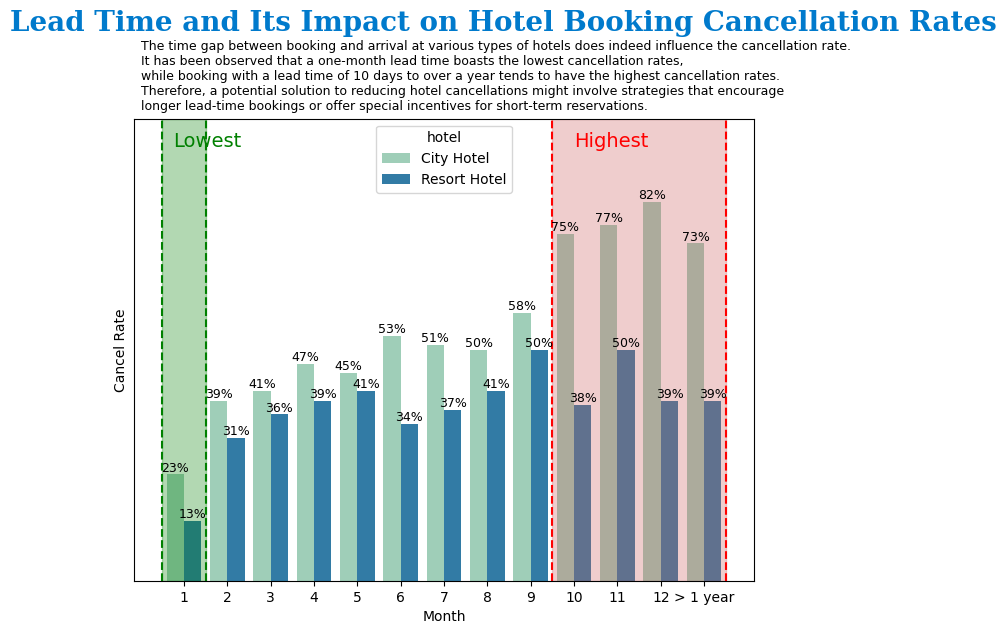

In [ ]:
plt.figure(figsize=(8, 6))
ax = sns.barplot(data=cancelation_leadtime_rate, x='leadtime_category', y='cancel_leadtime_rate', hue='hotel', palette='YlGnBu')
plt.ylim(0,100)
plt.tick_params(axis = 'y', which = 'both', left = False, right = False, labelleft = False)
plt.ylabel('Cancel Rate')
plt.xlabel('Month')

plt.axvline(8.5, ls='--', color='red')
plt.axvline(12.5, ls='--', color='red')
plt.stackplot(np.arange(8.5,13.5), [[100]], color='indianred', alpha=0.3)
plt.text(x=9, y=95, s='Highest', fontsize=14, color='red', va='center')

plt.axvline(0.5, ls='--', color='green')
plt.axvline(-0.5, ls='--', color='green')
plt.stackplot(np.arange(-0.5,1.5), [[100]], color='green', alpha=0.3)
plt.text(x=-0.25, y=95, s='Lowest', fontsize=14, color='green', va='center')

plt.title('Lead Time and Its Impact on Hotel Booking Cancellation Rates', fontsize=20, pad=30, loc='left', fontweight='bold', color='#007acc',
          fontfamily='serif',y=1.1, x=-0.2)
plt.text(x=-1, y=102, s="The time gap between booking and arrival at various types of hotels does indeed influence the cancellation rate.\nIt has been observed that a one-month lead time boasts the lowest cancellation rates,\nwhile booking with a lead time of 10 days to over a year tends to have the highest cancellation rates.\nTherefore, a potential solution to reducing hotel cancellations might involve strategies that encourage\nlonger lead-time bookings or offer special incentives for short-term reservations.", fontsize=9)

for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height:.0f}%', (p.get_x() + p.get_width() / 2, height),
                ha='center', va='bottom', fontsize=9, color='black')

In [ ]:
0